<a href="https://colab.research.google.com/github/Kr441-bit/EXPLORATORY-DATA-ANALYSIS-ZOMATO-DATASET-Bengaluru/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS - ZOMATO DATASET (Bengaluru)

### About the Dataset
This dataset is a collection of restaurants that are registered on Zomato in Bengaluru City. In this dataset, we have more than 50000 rows and 17 columns, a fairly large dataset. You will be able to get hands-on experience while performing the following tasks and will be able to understand how real-world problem statement analysis is done.

- Link to dataset: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

#### Feature Engineering
- Exploratory Data Analysis
- Handling Outliers
- Handling Missing Values
- Categorical Encoding 

#### Feature Selection
- Correlation
- Linear Regression
- Random Forest 

## Objective:

- Understand the Data
- Clean the Data
- Analysis of the relationship between the Data
        - What is the rate of orders online?
        - How many restaurants are allowed to book tables?
        - Which are the top 10 restaurants in Bangalore according to the sales point?
        - Which are the most preferred locations of restaurants?
        - Which are the most preferred cuisines of restaurants?
        - Which locations of restaurants have the highest number of votings?
        - What is the minimum charge for 2 people according to the type of restaurants shown differently according to online orders?
        - Which restaurant has the highest charge for 2 people and if they allow booking tables or not?
- To Predicate Rate Using Linear Regression and Random Forest

- So as we know what we are trying to solve we will look at how this data gives us information on the food, restaurants, and customer reviews. So we will perform an analysis of data to find the above-mentioned problems.

### Import libraries and dataset


In [3]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [4]:
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

data=pd.read_csv('/content/drive/MyDrive/EDA Zomato Dataset/zomato.csv',error_bad_lines=False,encoding='utf-8')
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

## Understanding the Data

In [6]:
data.shape

(51717, 17)

In [7]:
data.duplicated().sum()

0

In [8]:
data.tail(5)

url  \
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes           phone                    location  \
51712         No  3.6 /5     27    080 40301477                  Whitefield   
51713         No     NaN      0  +91 8197675843                  Whitefield   
51714         No     NaN      0             NaN                  Whitefield   
51715        Yes  4.3 /5    236    080 49652769  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  +91 8071117272  ITPL Main Road, Whitefield   

                rest_type                    dish_liked  \
51712                 Bar                           NaN   
51713                 Bar                           NaN   
51714                 Bar                           NaN   
51715                 Bar  Cocktails, Pizza, Buttermilk   
51716  Bar, Casual Dining                           NaN   

                                     cuisines approx_cost(for two people)  \
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
51712  [('Rated 5.0', "RATED\n  Food and service are ...        []   
51713                                                 []        []   
51714                                                 []        []   
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...        []   
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...        []   

      listed_in(type) listed_in(city)  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield

In [9]:
#data summary and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- feature name "url" doesnt give much information about exploring dataset bcoz it is nothing but websites unique address
- feature name "phone" also gives only the contact info of restaurants.
- feature name "address" is only the address of that particular restaurants.
- feature name "menu_item" dosen't give brief information
    - since these features in dataset not gives any information other than above mentioned. So it is better to drop them to simplify dataset

In [10]:
## Droping all unnecessary columns
data = data.drop(['url', 'phone','address','menu_item'], axis=1)

In [11]:
data.head(5)

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list listed_in(type)  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

## Clean the Data

In [12]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [13]:
#cleaning approx_cost(for two people column by removing
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].astype(str)
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].apply(lambda x: x.replace(",",""))

#converting the data type as it is mentioned object but is a float
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].astype(float)

In [14]:
#rate is a float but data type mentioned is object thus we will clean and convert the data type
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
def cleaning_rate(values):
    #replacing NEW and - value with nan with np.nan
    if(values=="NEW" or values=="-"):
        return np.nan
    else:
        values=str(values).split('/') #values=[4.1][/5]
        values=values[0] #taking only the 0 index as we only need the numerator
        return float(values)

In [16]:
#applying the cleanining function on the column 
data.rate = data['rate'].apply(cleaning_rate)

In [17]:
#here we can check that the data is clean and dtype is float 
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [18]:
#separate categorical data 
data_categorical=data.select_dtypes(include='object')
data_categorical.columns

Index(['name', 'online_order', 'book_table', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [19]:
#separate numerical data
data_numerical = data.select_dtypes(exclude='object')
data_numerical.columns

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

In [20]:
#sum of unique values in categorical columns 
data_categorical.nunique()

name                8792
online_order           2
book_table             2
location              93
rest_type             93
dish_liked          5271
cuisines            2723
reviews_list       22513
listed_in(type)        7
listed_in(city)       30
dtype: int64

In [21]:
data_categorical['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [22]:
#statistics summary for the cleaned data 
data.describe()

rate         votes  approx_cost(for two people)
count  41665.000000  51717.000000                 51371.000000
mean       3.700449    283.697527                   555.431566
std        0.440513    803.838853                   438.850728
min        1.800000      0.000000                    40.000000
25%        3.400000      7.000000                   300.000000
50%        3.700000     41.000000                   400.000000
75%        4.000000    198.000000                   650.000000
max        4.900000  16832.000000                  6000.000000

In [23]:
#checking if na columns 
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Handling Outliers

In [24]:
#defined a function to find outliers in the numerical data type column
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print(len(outliers))

#replacing outliers with  
def remove_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]=np.nan

In [25]:
#finding number of the outliers in the numerical columns 
column_num=data_numerical.columns
for i in column_num:
    print("Number of outliers in the column",i,":")
    find_outliers_IQR(data[i])
    
for i in column_num:
    remove_outlier(data[i])
    print("Value count after treatment in",i,":")
    find_outliers_IQR(data[i])

Number of outliers in the column rate :
187
Number of outliers in the column votes :
6961
Number of outliers in the column approx_cost(for two people) :
4764
Value count after treatment in rate :
0
Value count after treatment in votes :
4133
Value count after treatment in approx_cost(for two people) :
512


<ipython-input-24-4ddad35fc4c3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]=np.nan


In [26]:
#checking if na columns 
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10239
votes                           6961
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)     5110
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


#### Handling Missing Values

In [27]:
#replacing na  with mode for categorical rest type and  column
data.rest_type.fillna(data.rest_type.mode()[0], inplace= True)
data.cuisines.fillna(data.cuisines.mode()[0], inplace= True)
data.location.fillna(data.location.mode()[0], inplace= True)
#replacing na with mean for numerical data
for i in column_num:
    data[i].fillna(data[i].mean(), inplace= True)

In [28]:
#percentage of null values
data.isnull().mean().round(3)*100

name                            0.0
online_order                    0.0
book_table                      0.0
rate                            0.0
votes                           0.0
location                        0.0
rest_type                       0.0
dish_liked                     54.3
cuisines                        0.0
approx_cost(for two people)     0.0
reviews_list                    0.0
listed_in(type)                 0.0
listed_in(city)                 0.0
dtype: float64

- As we see the dish_liked null value percentage is 54% thus we can drop the column

In [29]:
data = data.drop(['dish_liked'], axis=1)

## Analysis of the relationship between the Data

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Exploratory data analysis (EDA) involves using graphics and visualizations to explore and analyze a data set. The goal is to explore, investigate and learn, as opposed to confirming statistical hypotheses.

## What is the rate of orders online?

In [30]:
x=data["online_order"].value_counts()
y=x.index
fig=px.pie(values=x,names=y,title="ONLINE ORDER RATE",color_discrete_sequence=['#F1BB71','#FCE4C3'])
fig.show()

## How many resturants allowed to book table?

In [31]:
x=data["book_table"].value_counts()
y=x.index
fig=px.pie(values=x,names=y,title="Booking Table",color_discrete_sequence=['#72D4F0','#B3E4F3'])
fig.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['approx_cost(for two people)'],name="count",texttemplate="%{x}", textfont_size=10,))
fig.show()

## Which are the top 10 restaurants in bangalore according to the sales point?

In [33]:
y=data["name"].value_counts()[:10]
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"Top 10 Restaurant Names in Bangalore","y":"Number of Sales Points"},
           title="Top 10 Restaurants in Bangalore - Number of Sales Point")
fig.update_traces(marker_color='#F4DE65')
fig.show()

## Which are the most preferred locations of restaurant?

In [34]:
x=data["location"].value_counts()[:10].sort_values()
y=x.index
fig=px.bar(x=x,y=y,labels={"y":"Top 10 Locations in Bangalore","x":"Number of Sales Points"},
           title="Most Preferred Locations of Restaurant")
fig.update_traces(marker_color='#F96BA5')
fig.show()

## Which are the most preferred cuisines of restaurant?

In [35]:
x=data["cuisines"].value_counts()[:10].sort_values()
y=x.index
fig=px.funnel(x=x,y=y,labels={"y":"Most Liked cuisines","x":"Number of cuisines Liked"},
           title="Most Preferred Cuisines in Bangalore")
fig.update_traces(marker_color='#AFDDE5')
fig.show()

## Which locations of resturants have the highest number of votings?

In [36]:
#Checking which location got most of votes
loc_votes_df = data[['votes','location']]
loc_votes_df.shape

(51717, 2)

In [37]:
loc_votes_df2=loc_votes_df.groupby(['location'])['votes'].sum()        
# summing all the votes for that perticular location
loc_votes_df2=loc_votes_df2.to_frame()
loc_votes_df2=loc_votes_df2.sort_values('votes',ascending=False)


In [38]:
loc_votes_df2.head(2)

votes
location                            
BTM                    310983.744705
Koramangala 5th Block  265889.506122

In [39]:
fig=px.bar(x= loc_votes_df2.index,y= loc_votes_df2['votes'],labels={"x":"Location in Bangalore","y":"Customers votes"},
           title="Location in Bangalore - Highest Customer Reviews")
fig.update_traces(marker_color='#31B0C6')
fig.show()

## What is the minimum charge for 2 person according to the type of restaurants show differently according to online orders?

In [40]:
fig = px.box(data,x='listed_in(type)', y="approx_cost(for two people)", color="online_order",
            title="Minimum charge for 2 person with type of restaurant online delivery ")
fig.show()

## Which restaurant have the highest charge for 2 person and if they allow booking table or not?

In [41]:
fig = px.ecdf(data, x="approx_cost(for two people)",y='listed_in(type)', color="book_table",
             title="Minimum charge for 2 person with the type of restaurant - If booking table is allowed or not:")
fig.show()

### Categorical Encoding 


In [42]:
newdf = data.copy()

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [43]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
newdf = newdf.drop(['name'], axis=1)
newdf['online_order']= label_encoder.fit_transform(newdf['online_order']) 
newdf['book_table']= label_encoder.fit_transform(newdf['book_table']) 
newdf['listed_in(city)']= label_encoder.fit_transform(newdf['listed_in(city)']) 
newdf['listed_in(type)']= label_encoder.fit_transform(newdf['listed_in(type)'])
newdf['location']= label_encoder.fit_transform(newdf['location'])
newdf['rest_type']= label_encoder.fit_transform(newdf['rest_type'])
newdf['cuisines']= label_encoder.fit_transform(newdf['cuisines'])
newdf['reviews_list']= label_encoder.fit_transform(newdf['reviews_list'])
newdf.head(3)

online_order  book_table  rate      votes  location  rest_type  cuisines  \
0             1           1   4.1  76.146081         1         27      2159   
1             1           0   4.1  76.146081         1         27       952   
2             1           0   3.8  76.146081         1         22       766   

   approx_cost(for two people)  reviews_list  listed_in(type)  listed_in(city)  
0                        800.0         10851                0                1  
1                        800.0         12530                0                1  
2                        800.0          4652                0                1

- Corelation between features

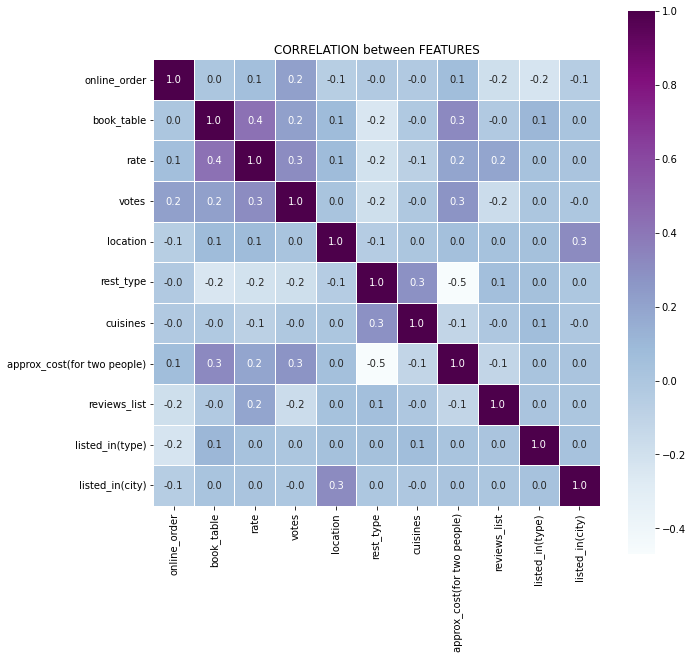

In [44]:
corr=newdf.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="BuPu",square=True)
plt.title("CORRELATION between FEATURES")
plt.show()

## Linear Regression Model - To Predicate Rate

In [45]:
y=newdf["rate"]
x=newdf.drop(["rate"],axis=1)
print("Shape of y:",y.shape)
print("Shape of x:",x.shape)

Shape of y: (51717,)
Shape of x: (51717, 10)


Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.A train test is the way of structuring your machine learning project so that you can test your hypothesis quickly and inexpensively. Basically it’s a way to divide the training data so that you can try your algorithm to one half and evaluate the result on the other half.A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set. There are a few different ways to do a train test split, but the most common is to simply split your data into two sets.

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [48]:
print("The difference between actual and predicted values of Training Data: ",np.sqrt(mean_squared_error(Y_train,model.predict(X_train))))
Y_pred_linear=model.predict(X_test)
linear_RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred_linear))
print("The difference between actual and predicted values of Testing Data: ",linear_RMSE)
print("--"*127)
print("It is the value which specifies the amount of the residual across the whole dataset.")
print("R2 SCORE:",model.score(x,y))

The difference between actual and predicted values of Training Data:  0.3223472706097088
The difference between actual and predicted values of Testing Data:  0.3244918906209553
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It is the value which specifies the amount of the residual across the whole dataset.
R2 SCORE: 0.29978123199516016


## Random Forest with the depth of 20 - To Predicate Rate

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [49]:
random_forest=RandomForestRegressor(max_depth=20,max_features=5,n_estimators=200)
random_forest_Model=random_forest.fit(X_train,Y_train)
print("The difference between actual and predicted values of Training Data: ",np.sqrt(mean_squared_error(Y_train,random_forest_Model.predict(X_train))))
y_pred_randomForest=random_forest_Model.predict(X_test)
randomForest_RMSE=np.sqrt(mean_squared_error(Y_test,y_pred_randomForest))
print("The difference between actual and predicted values of Testing Data: ",randomForest_RMSE)
print("--"*127)
print("It is the value which specifies the amount of the residual across the whole dataset.")
print("R2 SCORE:",random_forest_Model.score(x,y))

The difference between actual and predicted values of Training Data:  0.05068352062827666
The difference between actual and predicted values of Testing Data:  0.11219215287558712
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It is the value which specifies the amount of the residual across the whole dataset.
R2 SCORE: 0.9692680838108859


## Comparsion with results of Linear Regression and Random Forest with Actual Value

In [50]:
from tabulate import tabulate

results=pd.DataFrame({"y_actual":Y_test,"y_pred_linear":Y_pred_linear,
                     "y_pred_randomForest":y_pred_randomForest})
results= results.head(15)
print(tabulate(results , headers = ['Actual Values of Rate' , 'Predicted Value by Linear Regression' , 'Predicted Value by Random Forest'] , tablefmt = 'pretty', showindex =False))

+-----------------------+--------------------------------------+----------------------------------+
| Actual Values of Rate | Predicted Value by Linear Regression | Predicted Value by Random Forest |
+-----------------------+--------------------------------------+----------------------------------+
|          3.9          |          3.6114645897325057          |        3.830597732858578         |
|          2.8          |          3.5538871819001594          |         2.85515613561049         |
|          3.8          |          3.622579764097622           |        3.7332547383365107        |
|          3.5          |          3.678205246568173           |        3.477440776706928         |
|          3.5          |          3.646730978246583           |        3.488121031893597         |
|          3.2          |          3.4009204652857727          |        3.1923277611854046        |
|          3.9          |          3.708219437341803           |        3.906002674782179         |


#### Summary and Observations from Cleaned Data

In [51]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [52]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

prof = ProfileReport(newdf, minimal=True)
#prof.to_file(output_file='output.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
!pip install sweetviz --quiet 
#This is the line of code i am using in Jupyter notebook.

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



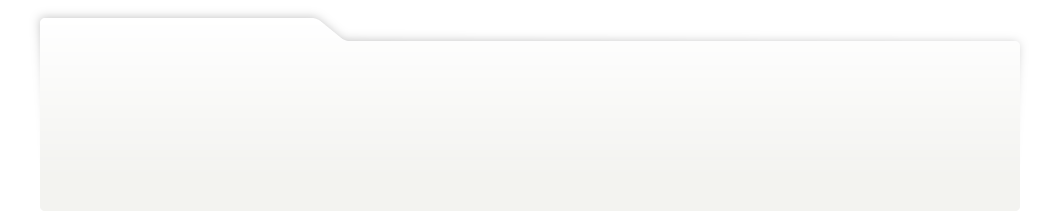
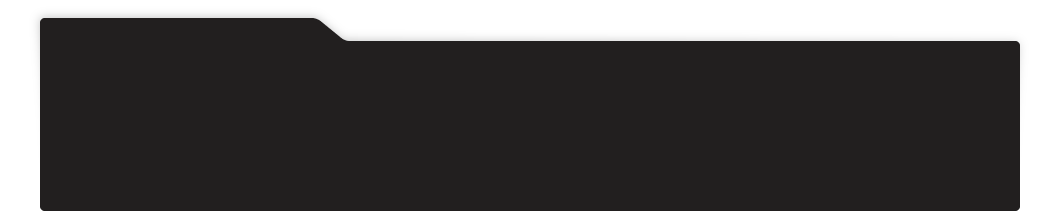
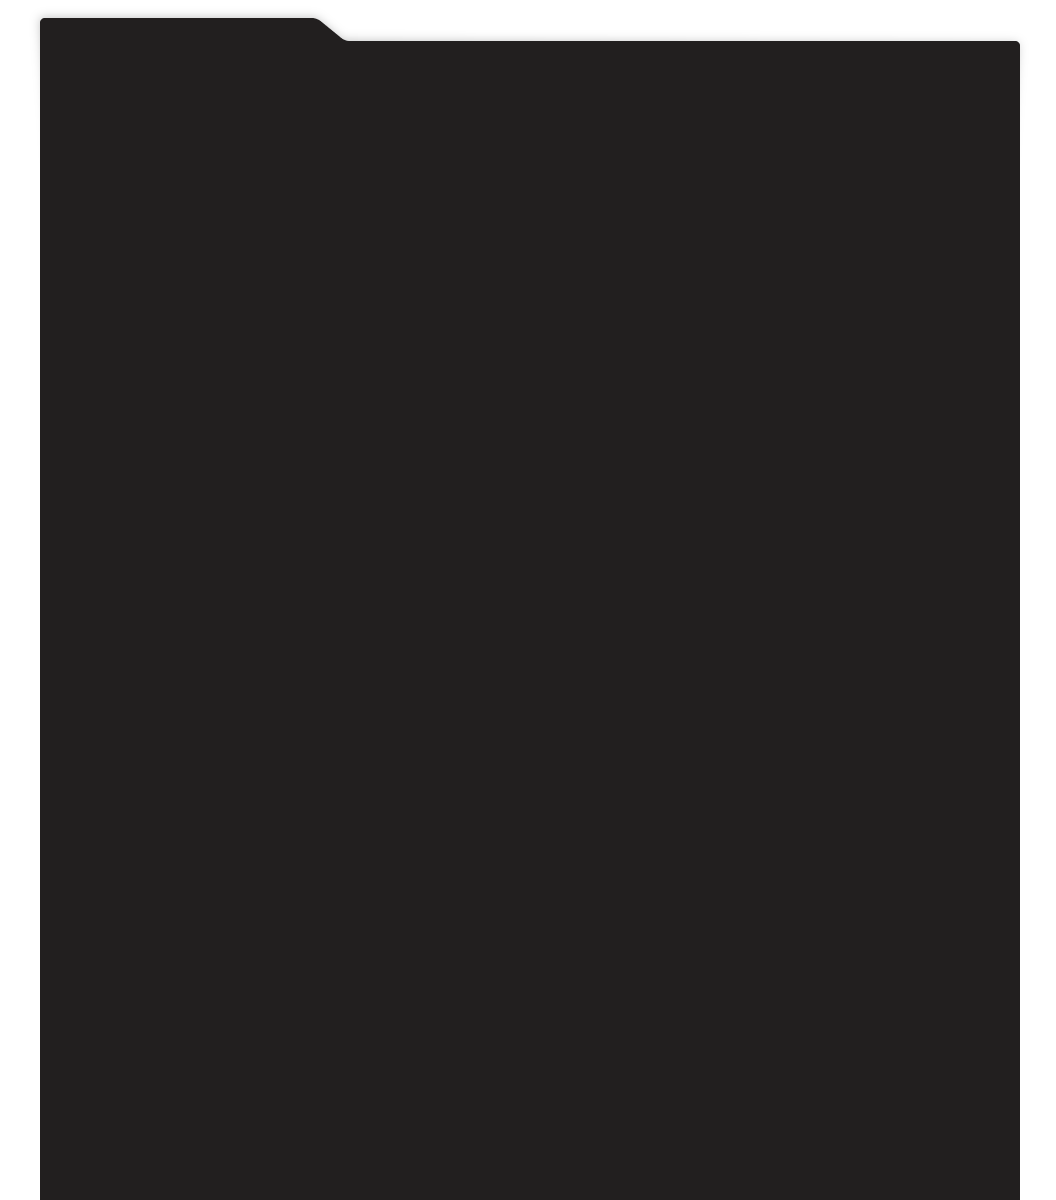
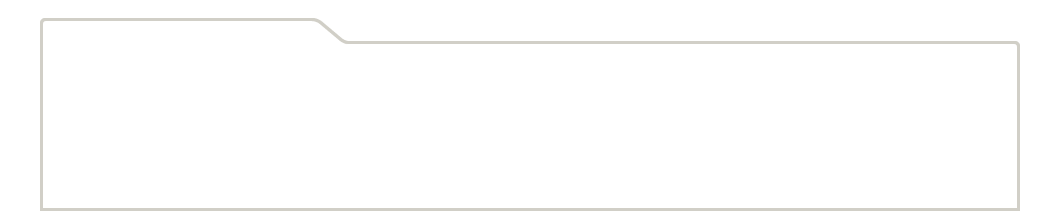
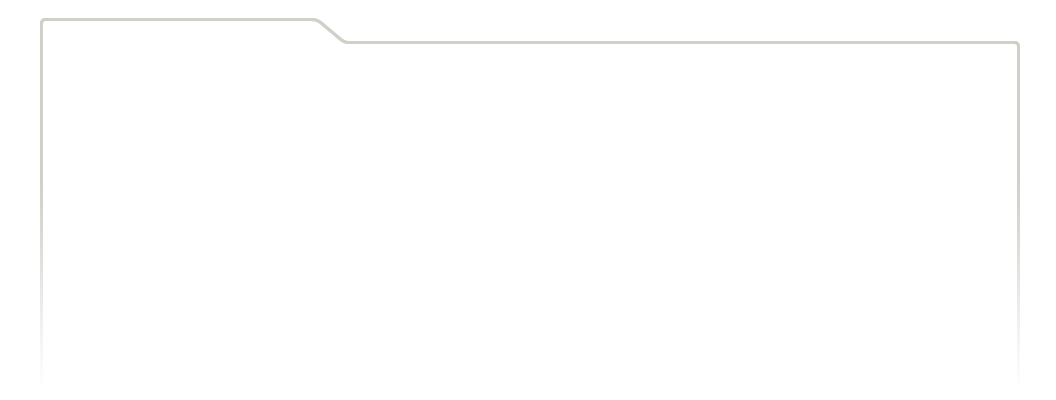
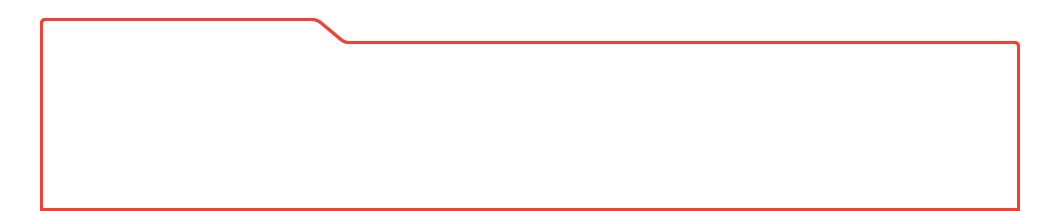
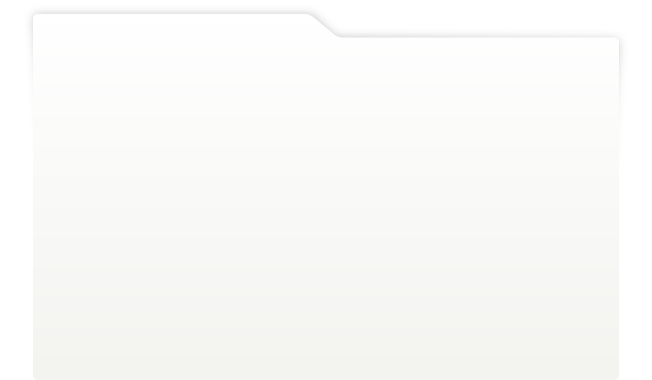
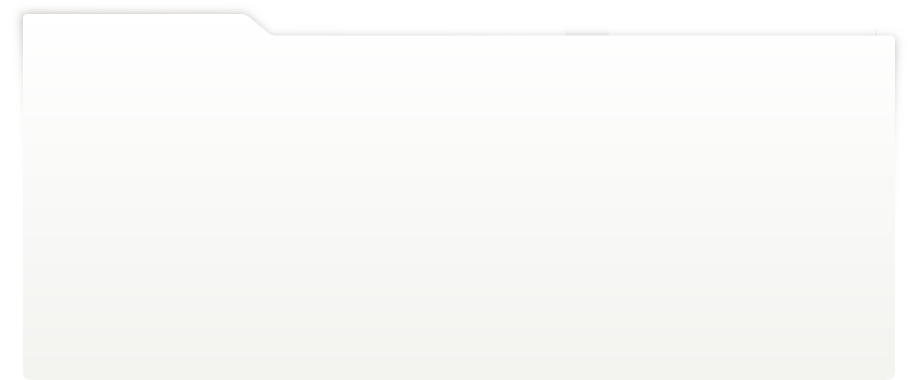
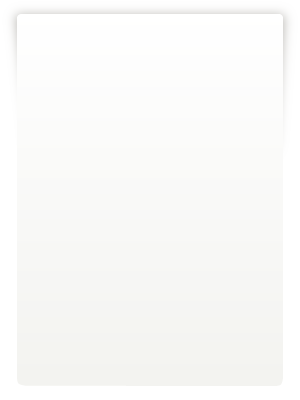
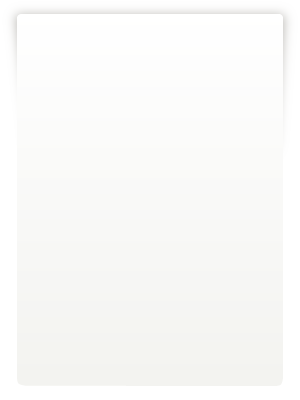
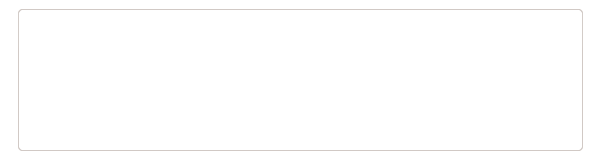
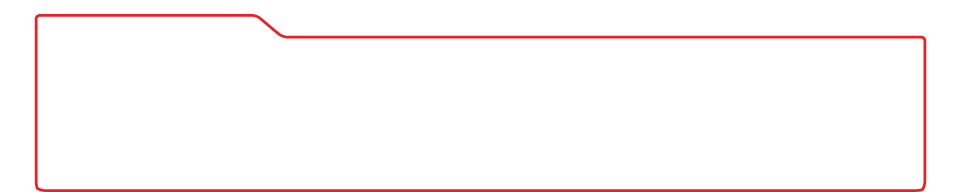
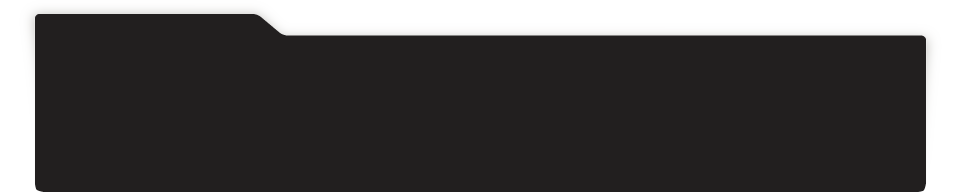
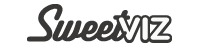
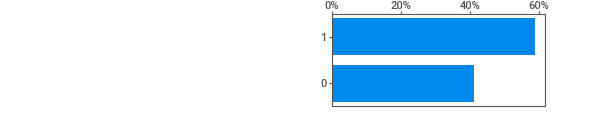
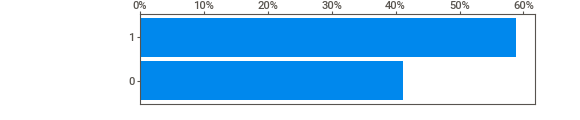
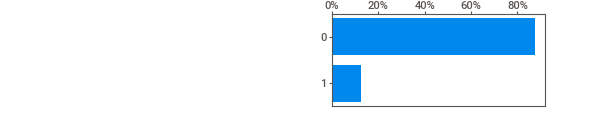
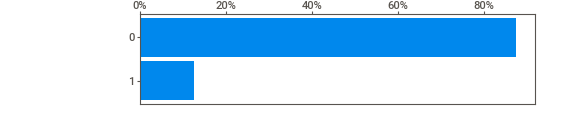
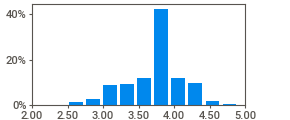
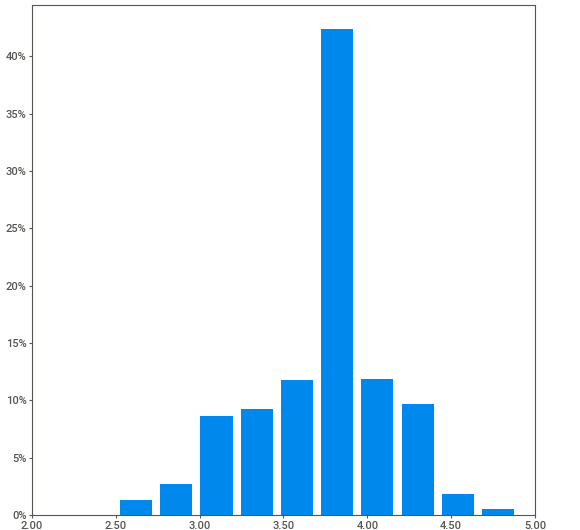
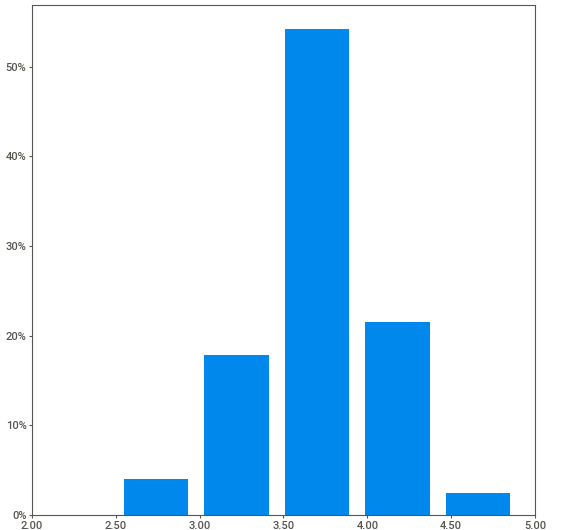
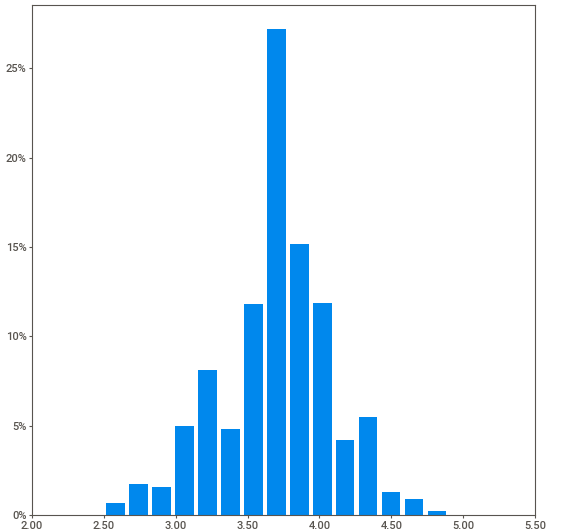
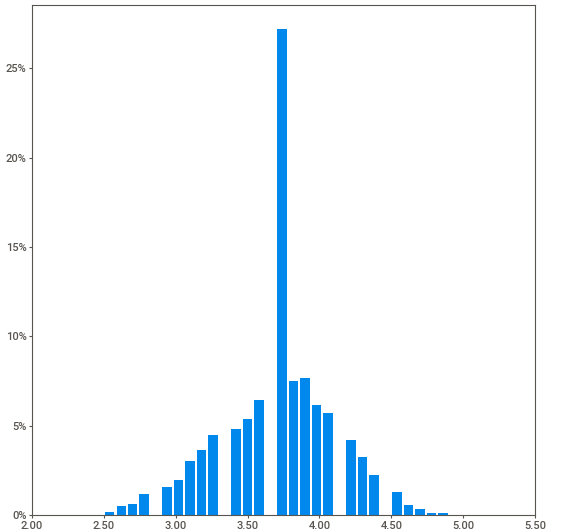
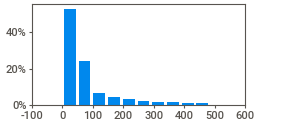
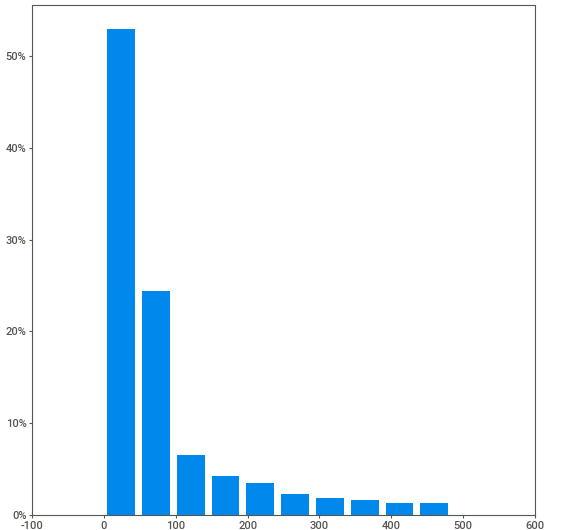
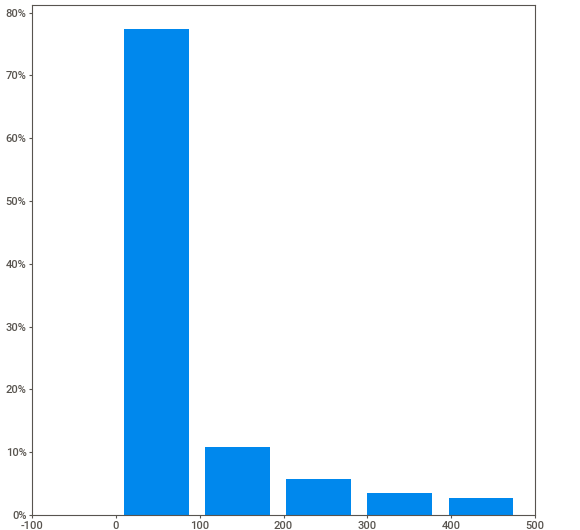
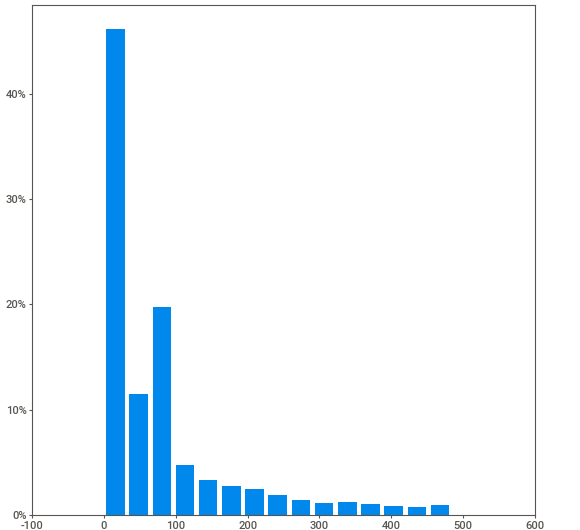
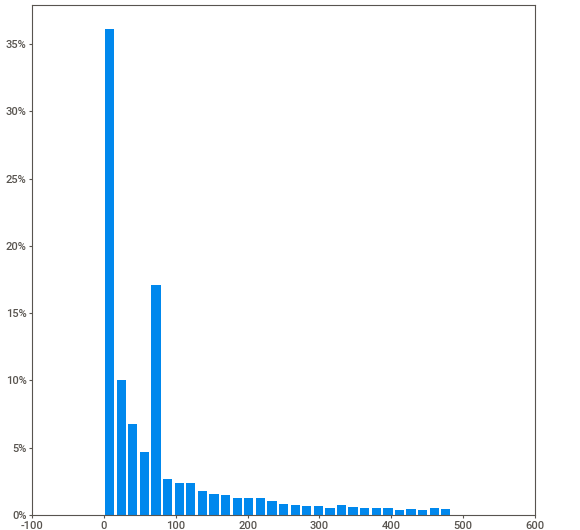
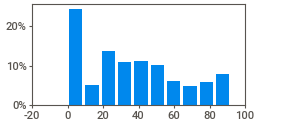
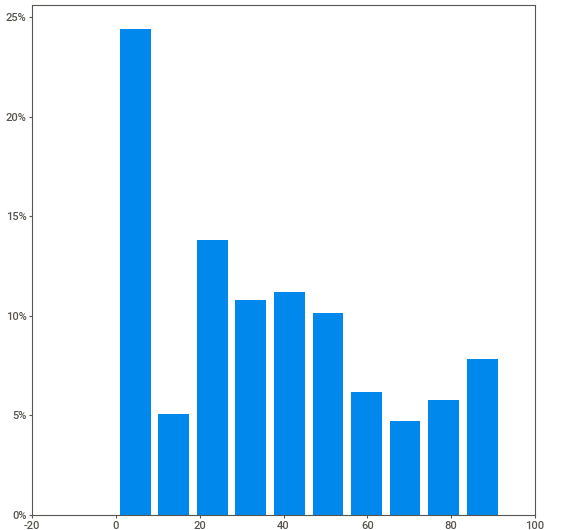
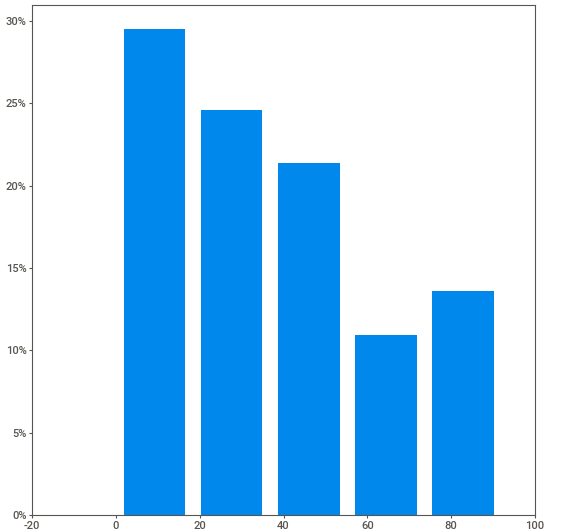
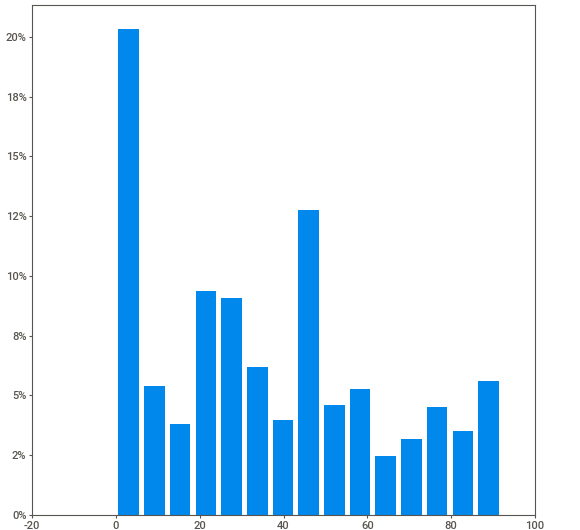
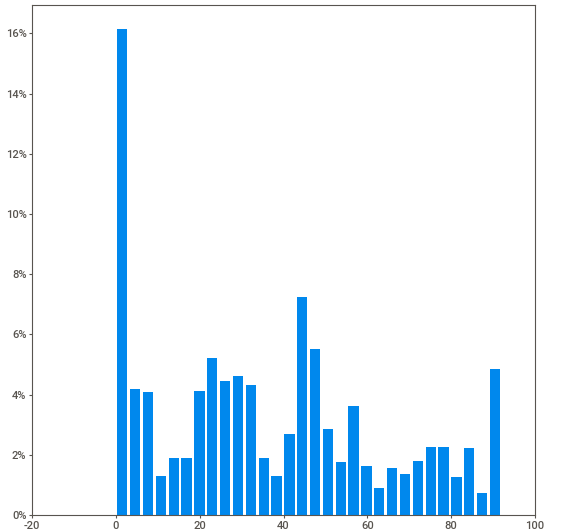
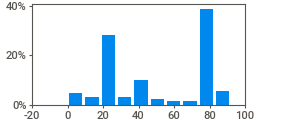
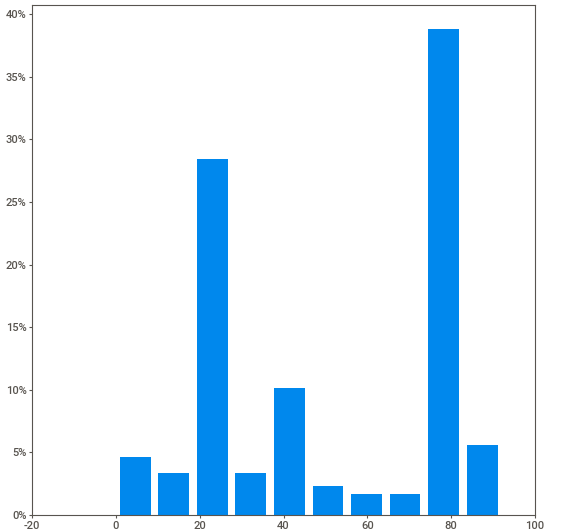
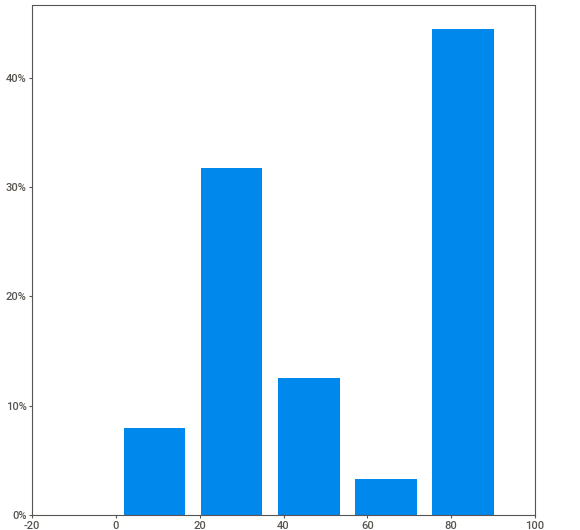
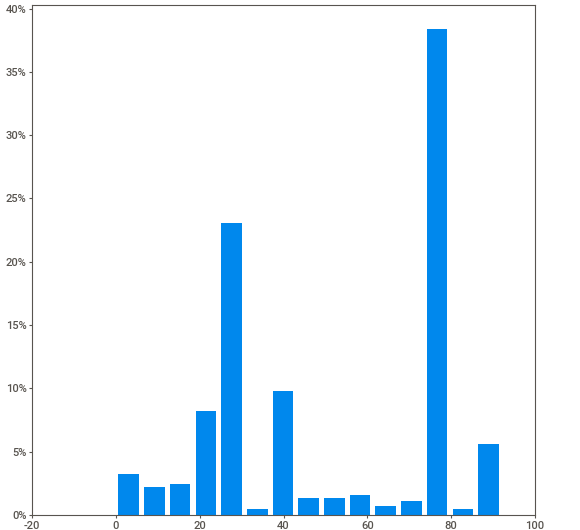
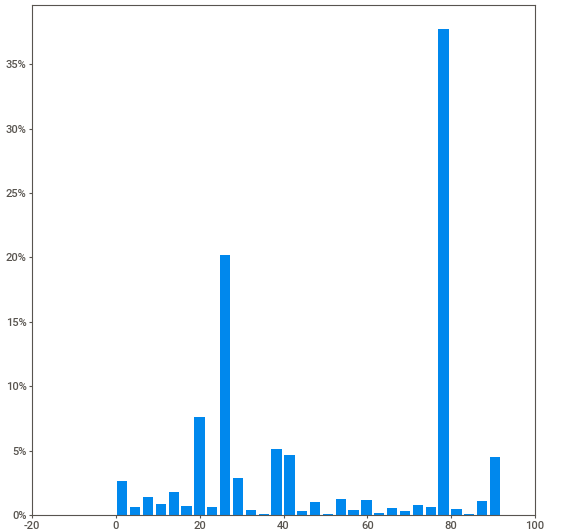
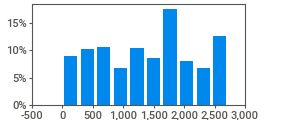
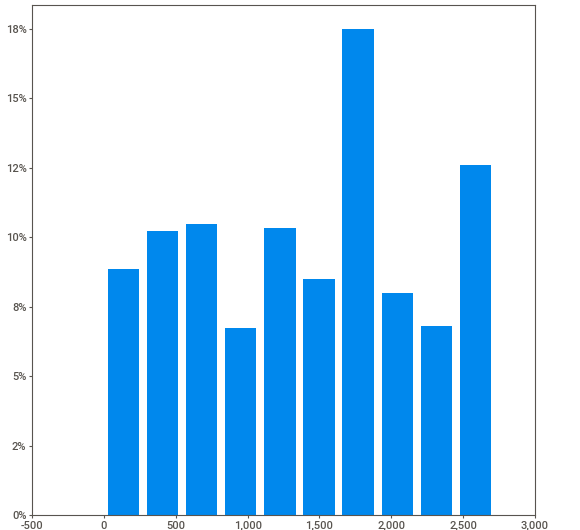
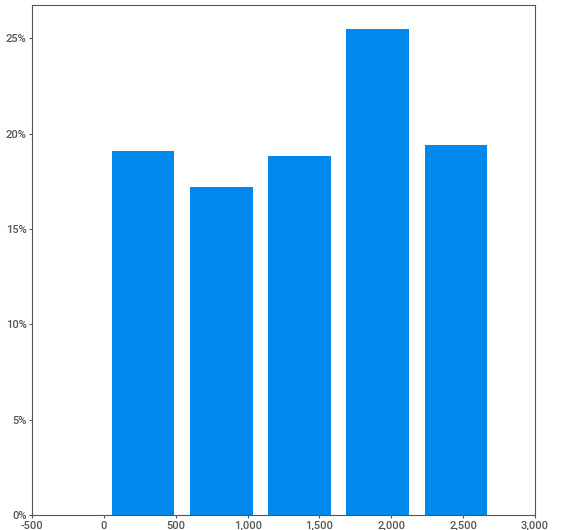
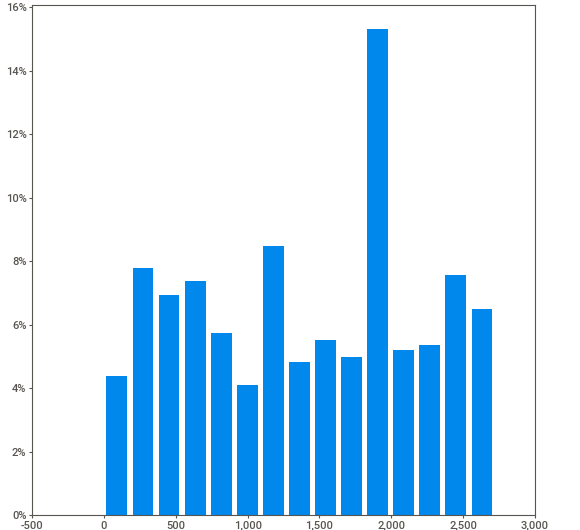
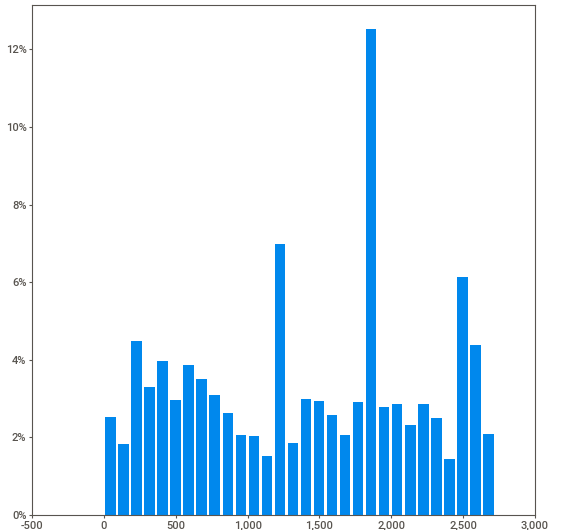
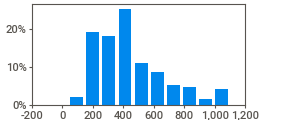
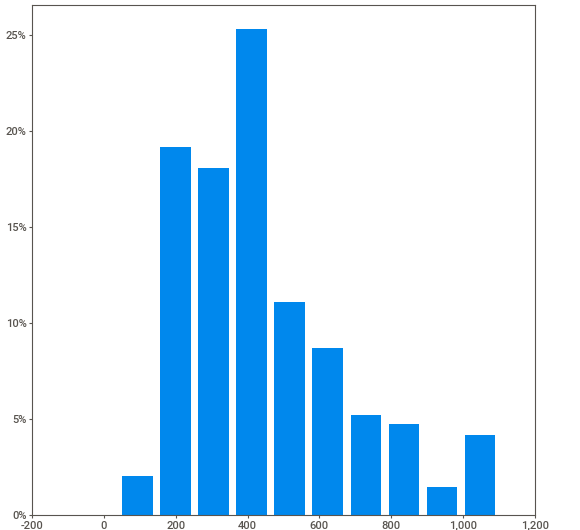
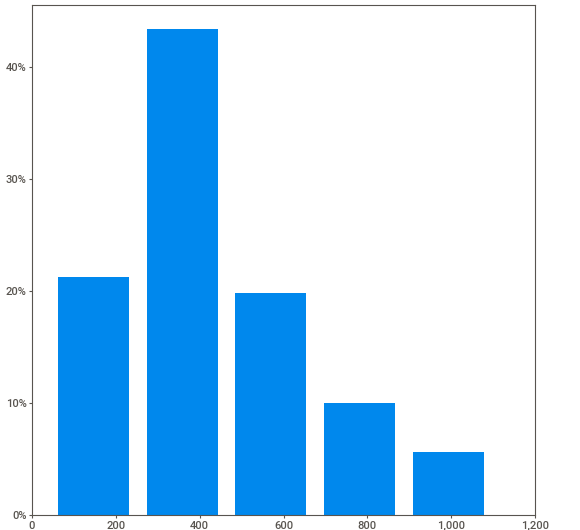
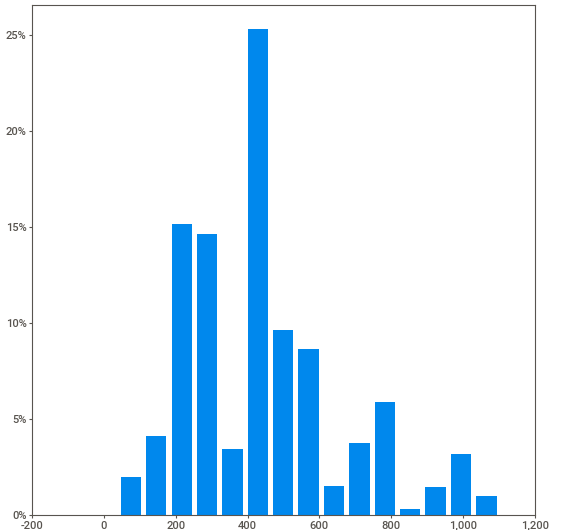
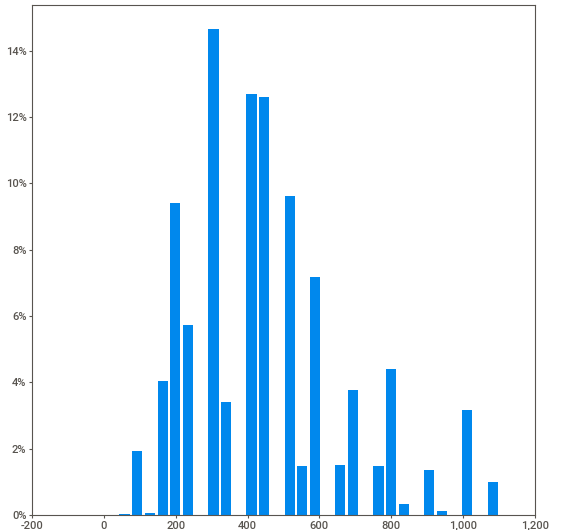
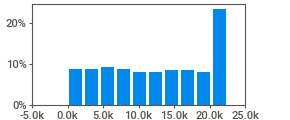
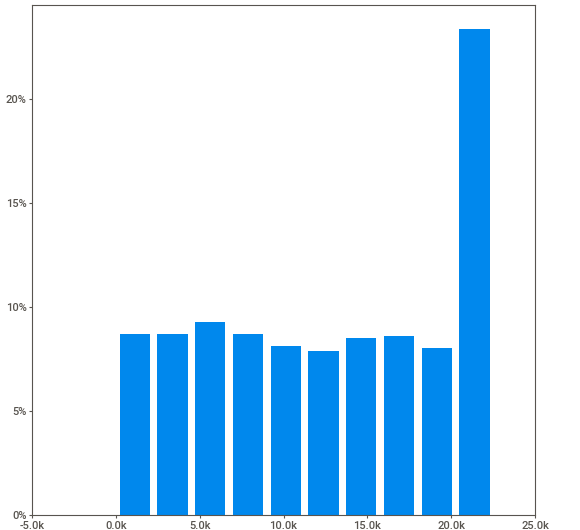
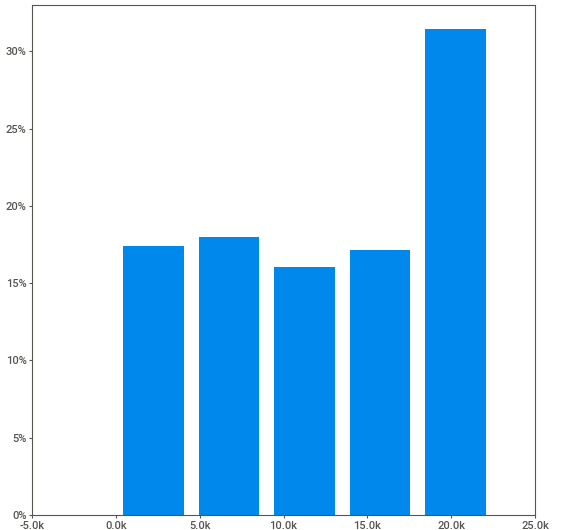
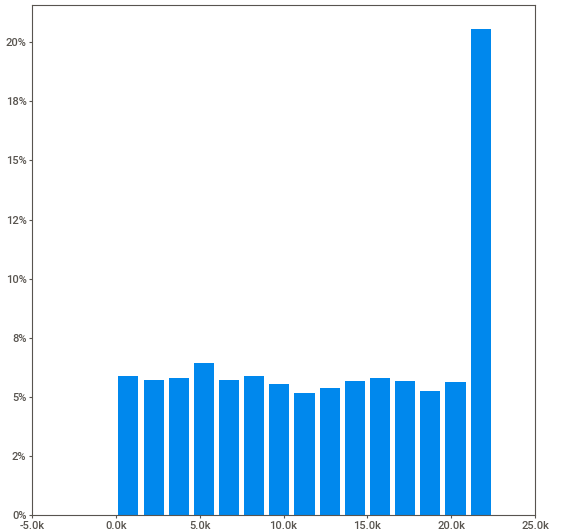
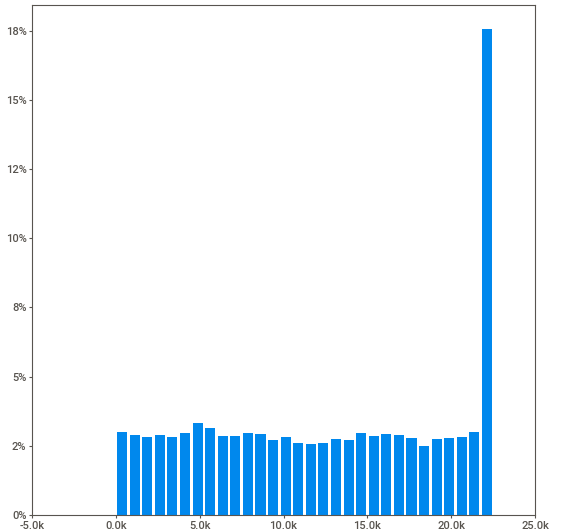
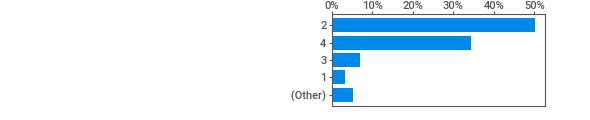
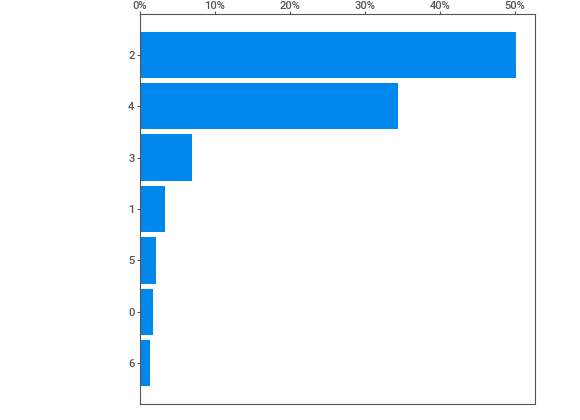
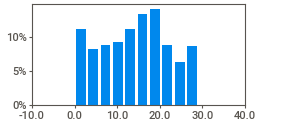
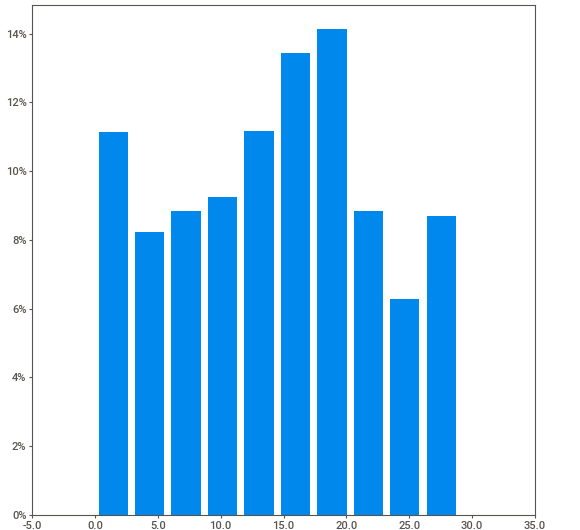
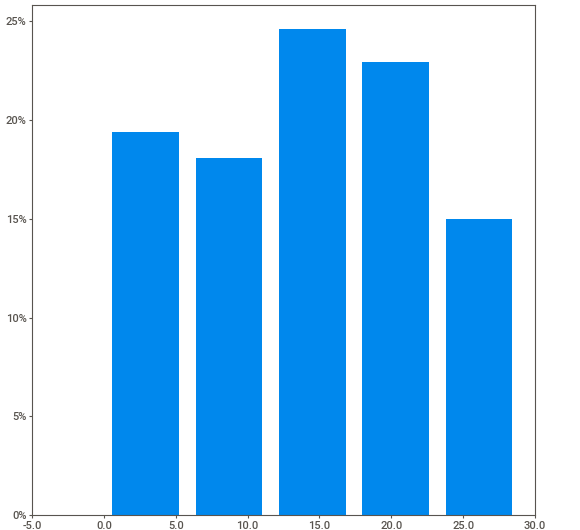
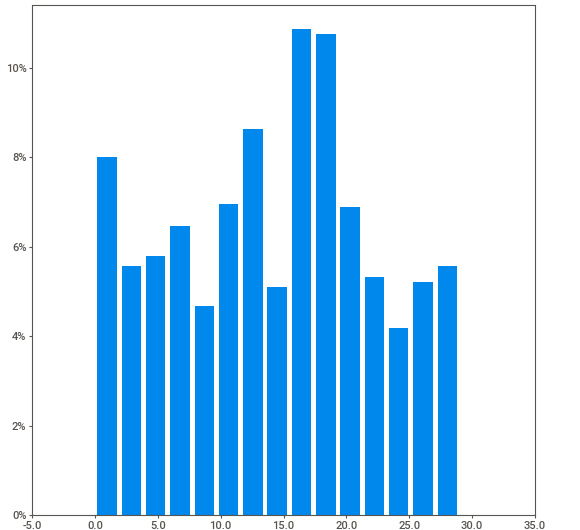
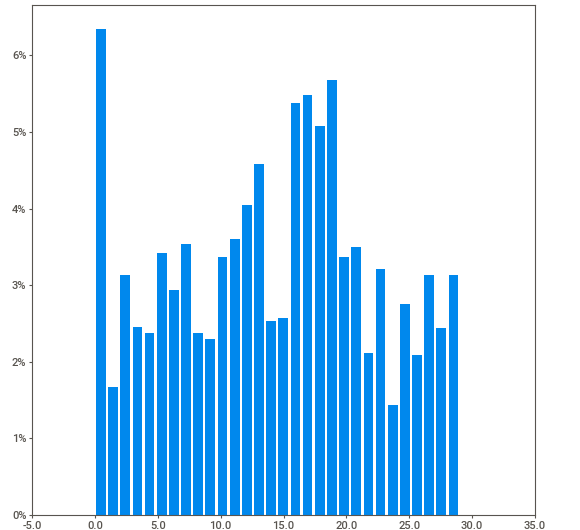
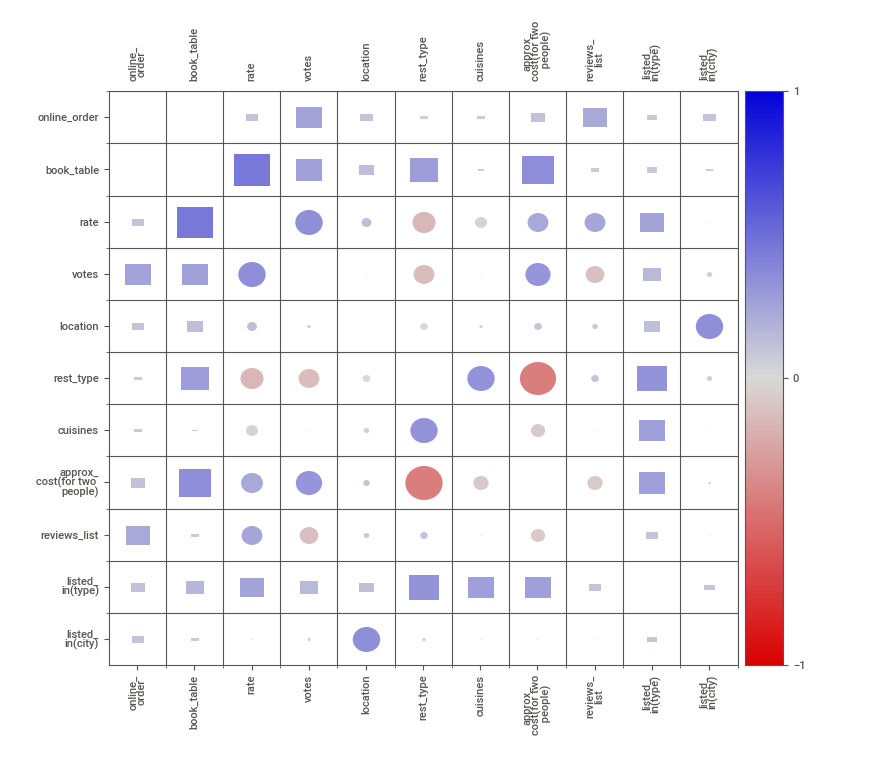
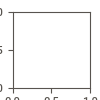

In [55]:
# using sweetviz, performing EDA

import sweetviz as sv
analyze_report = sv.analyze(newdf)
analyze_report.show_html('analyze.html', open_browser=False)

import IPython
IPython.display.HTML('analyze.html')


## Summary and Observations from Data
- The rate of orders online is 58.9%  in Bengaluru.
- In Bengaluru the approximate cost for two people in restaurants  is between 300 to 400.
- The top 10 restaurants in bengaluru according to the number of sales are analysed and few are listed below:

    Cafe Coffee Day with Number of sale is 96. 
    Onesta with Number of sale is 85.
    Just Bake with 73.
    Empire Restaurant and Five Star Chicken with 71 and 70 respectively.
    
    
- Most Preferred Locations of Restaurant accoding to the number of scales points is BTM, HSR, Koramangala 5th Block, JP Nagar, Whitefield, etc.
- Most preferred Cuisines is North Indian, Chinese, South Indian, Biryani etc.
- Minimum charge for 2 person according to the restaurant type and to analysed with online delivery rates.
        Buffet for online order the minimum is 400 and for dining it is 300.
        Cafes range from 50.
        Desserts starts with 80.
        Drinks and Nightlife(Mostly Dine-out) is 400 minimum.
        Pubs and bars is 200.
- To Predicate Rate Using Linear Regression and Random Forest with the depth of 20 
- We can see the accuracy of Linear Model is 29% and Random Forest is 96
